In [28]:
from importlib import reload
import scModel
reload(scModel)
myM = scModel.TripletModel(left=0, right=0, mu=1.5, t=1, inhomp=True)


import numpy as np

H = myM.HBdG()

In [29]:
A =-1
np.abs(A)

1

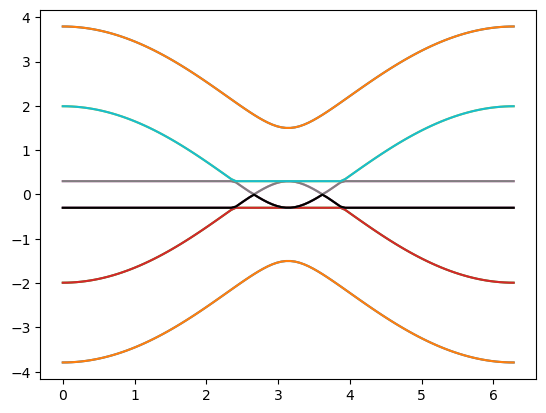

In [30]:
# Calculating energies along 
import numpy as np
import matplotlib.pyplot as plt

k = np.linspace(0, 2*np.pi, 100)

energies = np.array([np.linalg.eigvalsh(H(k_i, k_i)) for k_i in k])
energies2 = myM.solvHam(k, k)

plt.plot(k, energies)
plt.plot(k, energies2[5], color='black')

In [31]:
k = np.linspace(0, 2*np.pi, 100)

k1 = np.ones(100)
k0 = np.zeros(100)
path = np.concatenate((k, k, k*np.sqrt(2)))
kx = np.concatenate((k,np.pi*2*k1, k[::-1]))
ky = np.concatenate((k0, k, k[::-1]))

p = [i for i in range(np.shape(path)[0])]
np.shape(p)
energies = myM.solvHam(kx, ky)
np.shape(energies)

(12, 300)

In [32]:
emax = np.amax(energies)
emax = emax+0.1*emax

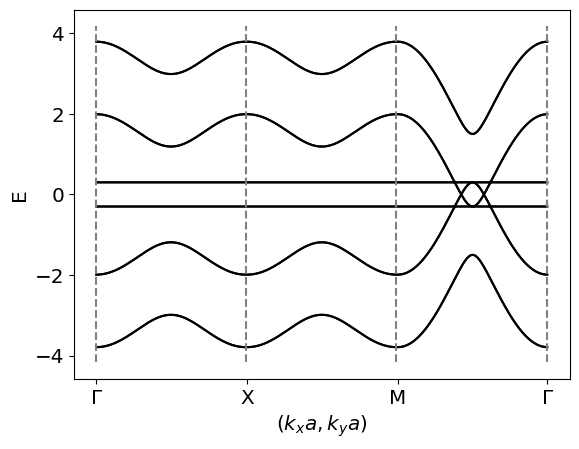

In [33]:
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-3, 3))

for i in energies:
    plt.plot(p, i, color='black')


plt.vlines([0, 99, 199, 299], [-emax, -emax, -emax, -emax], [emax, emax, emax, emax], colors= 'grey', linestyles='--')
#plt.vlines(250, -2, 2)

plt.savefig("Pictures/ESCpath_Trip.png")
plt.show()

In [34]:
E = myM.Es(k)
emax=np.amax(energies)
Earr = np.linspace(-emax-1,emax+1,200)
#Earr = np.linspace(-emax-1,emax+1,200)
emax

3.7913664589601925

In [35]:
DOS1 = myM.DOS(Earr, k, 0.4e-1)

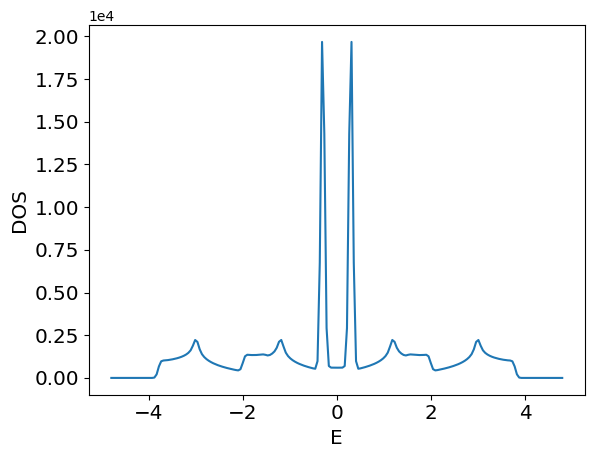

In [36]:
plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
#plt.ylim(0, 1e5)
plt.plot(Earr, DOS1)
#plt.vlines([emax, -emax], 0, 100, colors='black')

plt.savefig("Pictures/DOS_SC_Triplet.png")
plt.show()